In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sympy import symbols, solve
from sympy.plotting import plot

In [7]:
lam = 1
N = np.array([150, 50, 150, 80, 40, 250])
mu = np.array([36, 42, 42, 30, 60, 90])
mu = [1/mu[i] for i in range(len(mu))]
transitions = [lam/(N[i]-2) for i in range(len(N))]

def calulate_section_availability(transitions, mu):
    return [1-(transitions[i]/(transitions[i]+mu[i])) for i in range(len(transitions))]

section_availability = calulate_section_availability(transitions, mu)
section_availability

[0.8043478260869565,
 0.5333333333333332,
 0.7789473684210526,
 0.7222222222222223,
 0.3877551020408163,
 0.7337278106508875]

In [8]:
def availability_func(a: list):
    return (1-(1-a[0]*a[3])*(1-a[4]))*a[1]*a[2]*a[5]

availability_func(section_availability)

0.2266081585798939

In [9]:

max_employees = 20
availebilites = []
for employees in range(1, max_employees+1):
    section_availability = calulate_section_availability(transitions, [mu[i]*employees for i in range(len(mu))])
    availebilites.append(availability_func(section_availability))

availebilites


[0.2266081585798939,
 0.4582644359052558,
 0.5917740206998455,
 0.6745934841151228,
 0.7302221046076754,
 0.7699306929145467,
 0.7996087203196751,
 0.82259083190328,
 0.8408936568383548,
 0.8558036582695929,
 0.868178171614255,
 0.878609641340049,
 0.8875201313578439,
 0.895218224013354,
 0.9019346233608336,
 0.9078451870793426,
 0.9130862637551435,
 0.9177651690532727,
 0.9219675040530485,
 0.9257623708514078]

Text(0.5, 1.0, 'Availability with multiple employees')

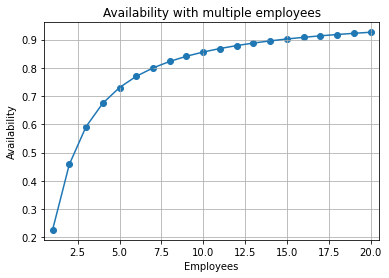

In [10]:
fig, ax = plt.subplots()
ax.plot(range(1,21), availebilites)
ax.scatter(range(1,21), availebilites)
ax.grid()
ax.set_xlim((0.5, 20.5))
ax.set_xlabel('Employees')
ax.set_ylabel('Availability')
ax.set_title("Availability with multiple employees")

In [11]:
def reliability_func(transitions:list, t):
    R = [np.exp(-transitions[i]*t) for i in range(len(transitions))]
    return (1-(1-R[0]*R[3])*(1-R[3]))*R[1]*R[2]*R[5]


x = np.linspace(0,100,10000)
R = reliability_func(transitions,x)

Text(0.5, 1.0, 'Reliability function')

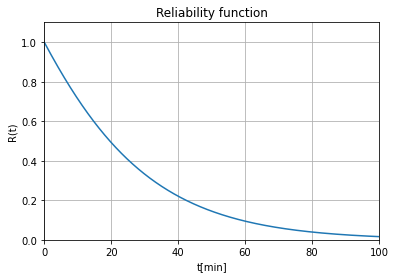

In [12]:
fig, ax = plt.subplots()
ax.plot(x,R)
ax.grid()
ax.set_xlim((0, 100))
ax.set_ylim((0, 1.1))
ax.set_xlabel('t[min]')
ax.set_ylabel('R(t)')
ax.set_title("Reliability function")

In [13]:
round(reliability_func(transitions, 60),6)

0.094352